In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Score is either 1 (for positive) or 0 (for negative).

df_yelp = pd.read_csv('C:\\Users\\kenne\\Desktop\\yelp_labelled.txt', delimiter='\t', header=None).dropna()

df_yelp.columns = ['feedback', 'score']

In [3]:
df_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 2 columns):
feedback    1000 non-null object
score       1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 19.5+ KB


In [4]:
df_yelp.describe()

,score
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
df_yelp.head()

,feedback,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
# Assigning features using terminology typically associated with bad reviews.

keywords = ['bad', 'cheap', 'dirty', 'disappointed', 'overpriced', 'poor', 'rude', 'terrible', 'wait']

for key in keywords:
    df_yelp[str(key)] = df_yelp.feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [7]:
# We're going to use the allcaps feature here as well, typically allcaps denotes someone is screaming and although they could
# be using allcaps to provide positive feedback, we'll assume the vast majority of instances are related to negative feedback.

df_yelp['allcaps'] = df_yelp.feedback.str.isupper()

In [8]:
df_yelp['score'] = (df_yelp['score'] == 0)

In [11]:
df_yelp.head(20)

,feedback,score,bad,cheap,dirty,disappointed,overpriced,poor,rude,terrible,wait,allcaps
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,False,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,False,False,False,False,False,False,False,False,False,False,False
5,Now I am getting angry and I want my damn pho.,True,False,False,False,False,False,False,False,False,False,False
6,Honeslty it didn't taste THAT fresh.),True,False,False,False,False,False,False,False,False,False,False
7,The potatoes were like rubber and you could te...,True,False,False,False,False,False,False,False,False,False,False
8,The fries were great too.,False,False,False,False,False,False,False,False,False,False,False
9,A great touch.,False,False,False,False,False,False,False,False,False,False,False


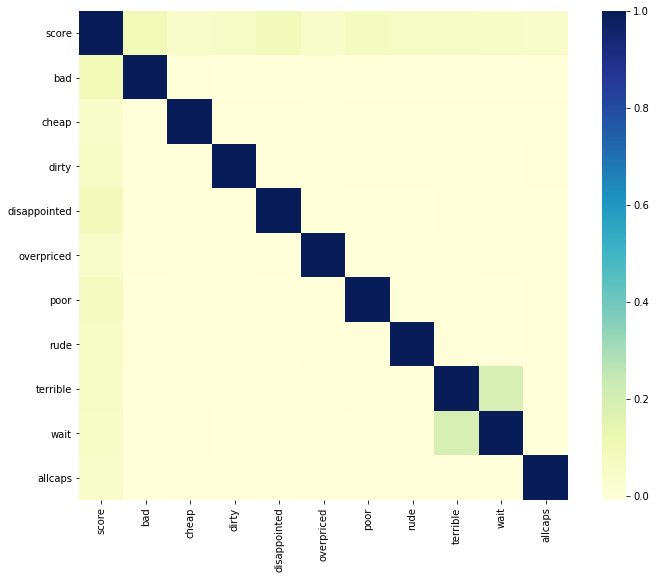

In [12]:
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(df_yelp.corr(), cmap='YlGnBu', square=True)

plt.show()

In [13]:
# Taining the data. Specify an outcome (y or dependent variable) and the inputs (x or independent variables).
data = df_yelp[keywords + ['allcaps']]
target = df_yelp['score']

In [14]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [15]:
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [16]:
#Display our results.
print("Number of mislabeled points out of a total of {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total of 1000 points: 457


In [24]:
print('The accuracy of my model is {}%.'.format((457 / 1000) * 100))

The accuracy of my model is 45.7%.


In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(target, y_pred)

array([[497,   3],
       [454,  46]], dtype=int64)

In [26]:
# Testing with Holdout groups.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.53
Testing on Sample: 0.543


These scores appear to be consistent. It doesn't seem like the model is overfitting.

In [37]:
# Cross Validation.
from sklearn.model_selection import cross_val_score

cross_val_score(bnb, data, target, cv=10)

array([0.54, 0.53, 0.53, 0.53, 0.52, 0.54, 0.55, 0.56, 0.52, 0.56])

These scores are relatively consistent.



Engineering new features:



In [39]:
df_yelp = pd.read_csv('C:\\Users\\kenne\\Desktop\\yelp_labelled.txt', delimiter='\t', header=None).dropna()

df_yelp.columns = ['feedback', 'score']

df_yelp.head(5)

,feedback,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [40]:
# Doubling the number of features that are typically associated with bad reviews.

keywords = ['bad', 'cheap', 'dirty', 'disappointed', 'overpriced', 'poor', 'rude', 'terrible', 'wait',
           'bland', 'frustrated', 'gross', 'joke', 'never return', 'no stars', 'overcooked', 'suck', 'worst']

for key in keywords:
    df_yelp[str(key)] = df_yelp.feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [41]:
df_yelp['allcaps'] = df_yelp.feedback.str.isupper()

In [43]:
df_yelp['score'] = (df_yelp['score'] == 0)

In [44]:
df_yelp.head(3)

,feedback,score,bad,cheap,dirty,disappointed,overpriced,poor,rude,terrible,...,bland,frustrated,gross,joke,never return,no stars,overcooked,suck,worst,allcaps
0,Wow... Loved this place.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
# Run model.
data = df_yelp[keywords + ['allcaps']]
target = df_yelp['score']

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total of {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total of 1000 points: 444


In [46]:
print('The accuracy of my model is {}%.'.format((444 / 1000) * 100))

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

The accuracy of my model is 44.4%.


array([[496,   4],
       [440,  60]], dtype=int64)

Accuracy fell slightly despite doubling the number of features.



Removing half of the original features, including allcaps:



In [47]:
df_yelp = pd.read_csv('C:\\Users\\kenne\\Desktop\\yelp_labelled.txt', delimiter='\t', header=None).dropna()

df_yelp.columns = ['feedback', 'score']

In [49]:
keywords = ['bad', 'disappointed', 'overpriced', 'poor', 'terrible']

for key in keywords:
    df_yelp[str(key)] = df_yelp.feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [50]:
df_yelp['score'] = (df_yelp['score'] == 0)

In [51]:
df_yelp.head(3)

,feedback,score,bad,disappointed,overpriced,poor,terrible
0,Wow... Loved this place.,False,False,False,False,False,False
1,Crust is not good.,True,False,False,False,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False,False,False


In [53]:
# Run model.
data = df_yelp[keywords]
target = df_yelp['score']

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total of {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total of 1000 points: 473


In [54]:
print('The accuracy of my model is {}%.'.format((473 / 1000) * 100))

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

The accuracy of my model is 47.3%.


array([[500,   0],
       [473,  27]], dtype=int64)

Accurracy in the model increased slightly with only half of the original features.



Using single feature:




In [60]:
df_yelp = pd.read_csv('C:\\Users\\kenne\\Desktop\\yelp_labelled.txt', delimiter='\t', header=None).dropna()

df_yelp.columns = ['feedback', 'score']

In [61]:
keywords = ['bad']

for key in keywords:
    df_yelp[str(key)] = df_yelp.feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [62]:
df_yelp['score'] = (df_yelp['score'] == 0)

In [63]:
df_yelp.head(3)

,feedback,score,bad
0,Wow... Loved this place.,False,False
1,Crust is not good.,True,False
2,Not tasty and the texture was just nasty.,True,False


In [64]:
data = df_yelp[keywords]
target = df_yelp['score']

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total of {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total of 1000 points: 491


In [65]:
print('The accuracy of my model is {}%.'.format((491 / 1000) * 100))

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

The accuracy of my model is 49.1%.


array([[500,   0],
       [491,   9]], dtype=int64)

Accurracy in the model continued to increase, still only slightly, using just one of the original features.



Using single feature not in the original list:



In [66]:
df_yelp = pd.read_csv('C:\\Users\\kenne\\Desktop\\yelp_labelled.txt', delimiter='\t', header=None).dropna()

df_yelp.columns = ['feedback', 'score']

In [67]:
keywords = ['not like']

for key in keywords:
    df_yelp[str(key)] = df_yelp.feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [68]:
df_yelp['score'] = (df_yelp['score'] == 0)

In [69]:
df_yelp.head(3)

,feedback,score,not like
0,Wow... Loved this place.,False,False
1,Crust is not good.,True,False
2,Not tasty and the texture was just nasty.,True,False


In [70]:
data = df_yelp[keywords]
target = df_yelp['score']

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total of {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total of 1000 points: 496


In [71]:
print('The accuracy of my model is {}%.'.format((496 / 1000) * 100))

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

The accuracy of my model is 49.6%.


array([[500,   0],
       [496,   4]], dtype=int64)

Accurracy in the model increased from the original still with using only one feature, but was nearly the same as using just one of the original features despite being a new feature.



Using a brand new set of features, smaller in size and none of which have been used before:



In [72]:
df_yelp = pd.read_csv('C:\\Users\\kenne\\Desktop\\yelp_labelled.txt', delimiter='\t', header=None).dropna()

df_yelp.columns = ['feedback', 'score']

In [73]:
keywords = ['not come back', 'never go back', 'not recommend']

for key in keywords:
    df_yelp[str(key)] = df_yelp.feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [74]:
df_yelp['score'] = (df_yelp['score'] == 0)

In [75]:
df_yelp.head(3)

,feedback,score,not come back,never go back,not recommend
0,Wow... Loved this place.,False,False,False,False
1,Crust is not good.,True,False,False,False
2,Not tasty and the texture was just nasty.,True,False,False,False


In [76]:
data = df_yelp[keywords]
target = df_yelp['score']

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total of {} points: {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total of 1000 points: 496


In [77]:
print('The accuracy of my model is {}%.'.format((496 / 1000) * 100))

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

The accuracy of my model is 49.6%.


array([[500,   0],
       [496,   4]], dtype=int64)

The more features present seems to open the model to potential overfitting. Using a smaller number of featuers tends to increase the accuracy.